# Tutorial: Visualizing a Decision Tree Regressor

Di subchapter sebelumnya, kita belajar secara konseptual bagaimana Decision Tree bekerja dan melihat hasil prediksinya yang berbentuk "tangga". Namun, kita belum melihat "otak" dari model itu sendiri. Pertanyaan apa yang sebenarnya ia ajukan? Di mana ia memutuskan untuk memecah data?

Di notebook ini, kita akan belajar cara **memvisualisasikan struktur pohon keputusan** itu sendiri. Ini adalah salah satu keunggulan terbesar dari Decision Tree: modelnya sangat **dapat diinterpretasikan (interpretable)**. Kita bisa melihat dengan tepat logika yang digunakannya untuk membuat prediksi.


---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Menggunakan fungsi `plot_tree` dari Scikit-learn untuk memvisualisasikan Decision Tree.
* Menginterpretasikan informasi yang ada di setiap simpul (node) dari pohon yang divisualisasikan.
* Menghubungkan secara langsung antara pertanyaan di dalam pohon dengan "langkah-langkah" pada plot prediksi.


---
### 2. Setup: Melatih Model Sederhana

Untuk membuat visualisasi yang mudah dibaca, kita akan melatih kembali Decision Tree yang "dangkal" (`max_depth=3`) pada data non-linear kita.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree

# tema
sns.set_theme(style="whitegrid", context="talk")

X = np.linspace(0, 10, 100).reshape(-1, 1)
Y = np.sin(X).ravel() + np.random.rand(100)*0.5

# latih model
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X, Y)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf

---
### 3. Visualisasi Struktur Pohon dengan `plot_tree`

Scikit-learn menyediakan fungsi `plot_tree` yang sangat berguna untuk menggambar struktur pohon keputusan.


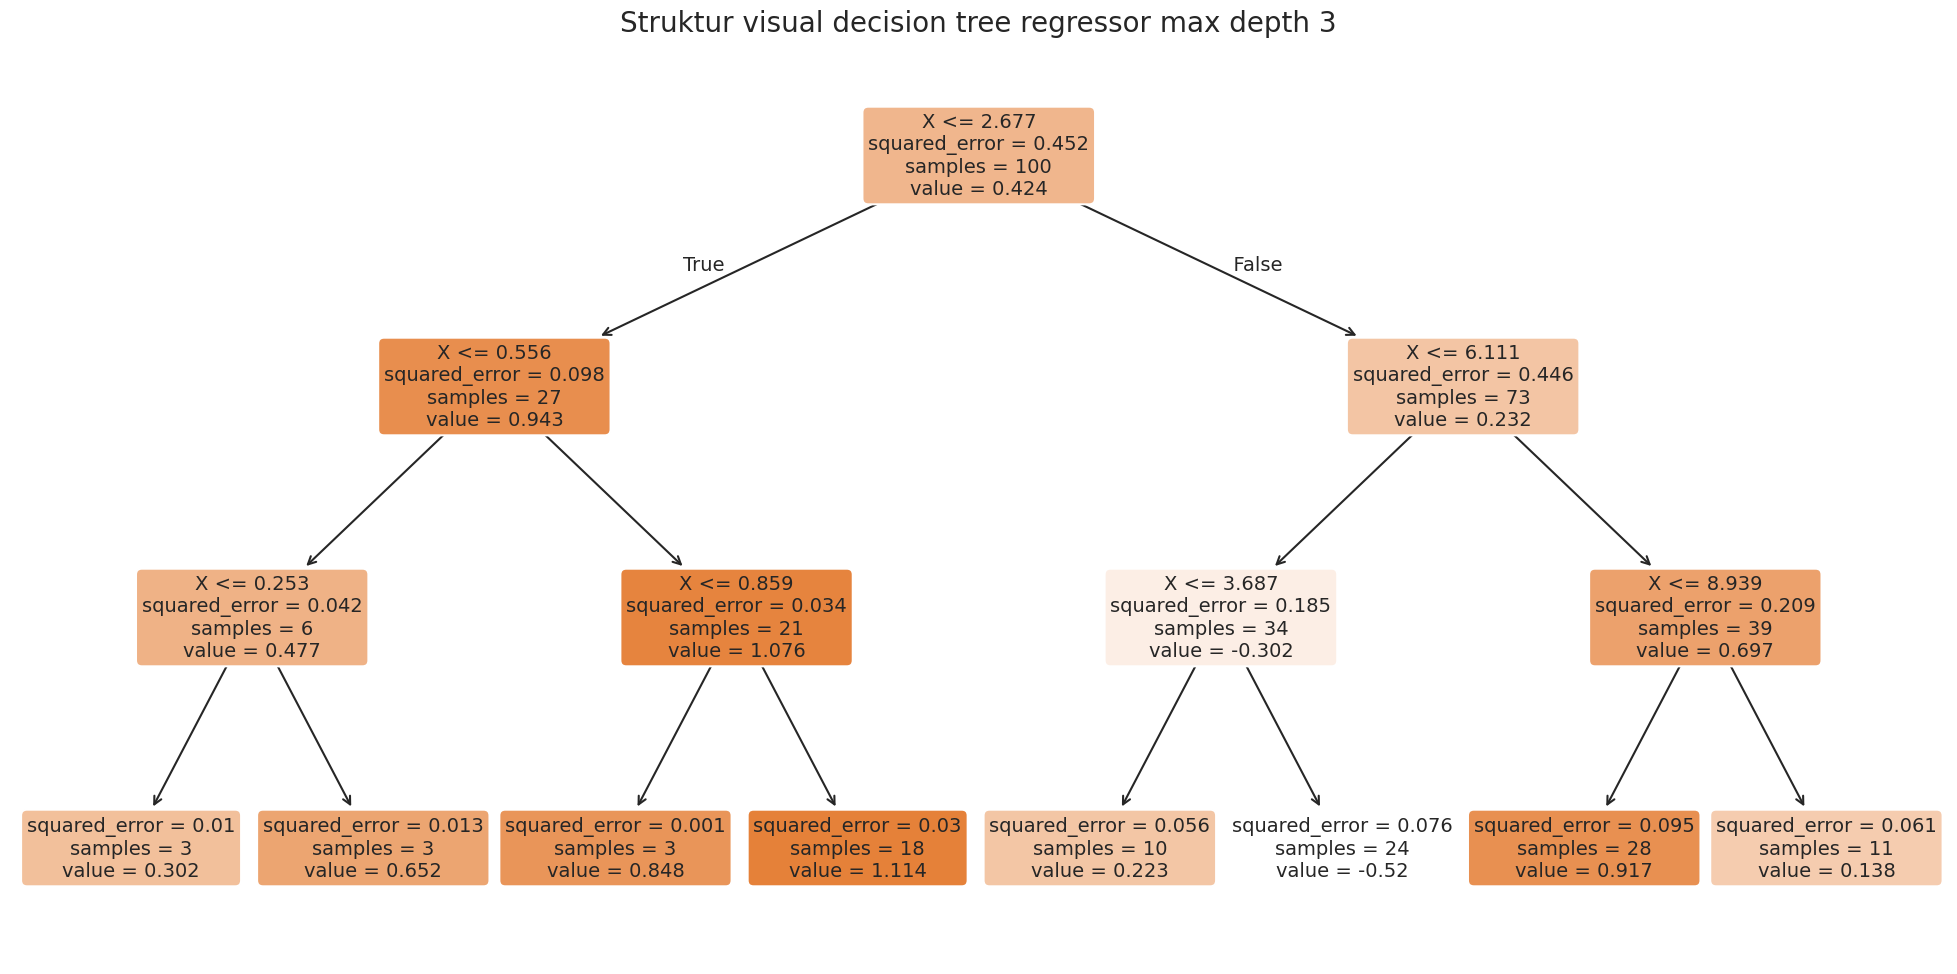

In [22]:
plt.figure(figsize=(25,12))

plot_tree(
    tree_reg,
    feature_names=["X"],
    filled=True,
    rounded=True,
    fontsize=14
)

plt.title("Struktur visual decision tree regressor max depth 3", fontsize=20)
plt.show()

---
### 4. Cara Membaca Pohon Keputusan

Mari kita bedah informasi yang ada di dalam setiap kotak (node):

**Contoh: Root Node (Kotak Paling Atas)**
```
X <= 2.788
mse = 0.48
samples = 100
value = 0.43
```

* **`X <= 2.788`**: Ini adalah **pertanyaan** atau **aturan pemecahan (split rule)**. Pohon ini bertanya, "Apakah nilai fitur 'X' lebih kecil dari atau sama dengan 2.788?". Semua data yang memenuhi kondisi ini akan pergi ke cabang kiri (True), dan sisanya ke cabang kanan (False).

* **`mse = 0.48`**: **Mean Squared Error**. Ini adalah ukuran seberapa "tercampur" atau beragamnya nilai target (`y`) dari semua sampel di node ini. Semakin kecil MSE, semakin homogen kelompoknya.

* **`samples = 100`**: Jumlah sampel data pelatihan yang ada di node ini. Di root node, ini adalah jumlah total sampel.

* **`value = 0.43`**: Ini adalah **prediksi** dari node ini. Nilai ini adalah **rata-rata** dari semua `y` dari 100 sampel yang ada di node ini. Jika pohon kita berhenti di sini, ia akan memprediksi xxxx untuk semua data.

* **Warna:** Warna node (dari oranye muda ke coklat tua) secara visual merepresentasikan `value`. Semakin gelap warnanya, semakin tinggi nilai rata-ratanya.



---
### 5. Menghubungkan Struktur Pohon dengan Plot Prediksi

Sekarang, mari kita lihat kembali plot prediksi "tangga" kita dan lihat bagaimana ia berhubungan langsung dengan aturan pemecahan di pohon.


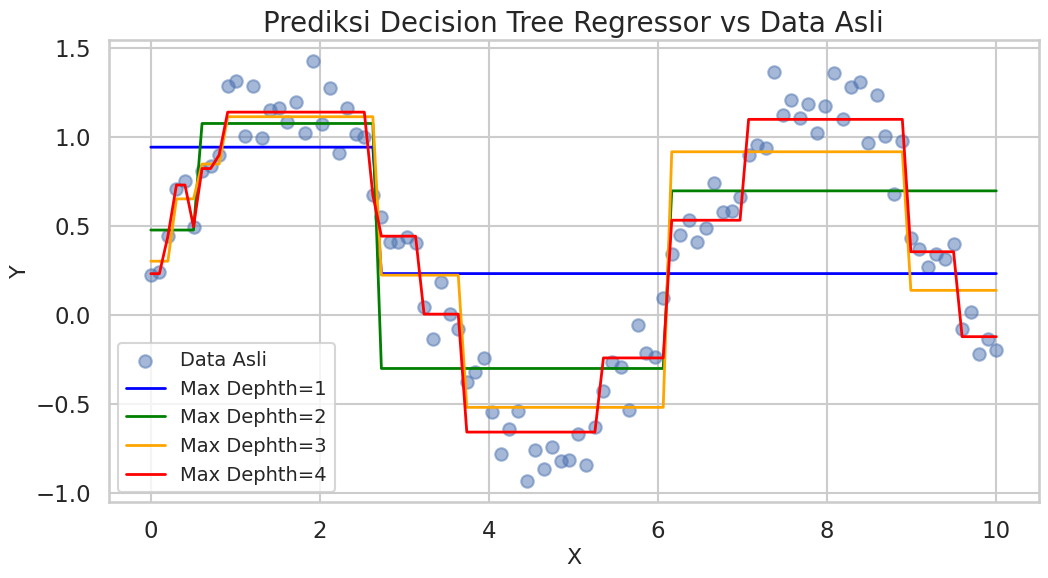

In [44]:
# buat prediksi
def plot_tree_reg(depth, color, label):
    # latih model
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg.fit(X, Y)
    Y_pred = tree_reg.predict(X)
    plt.plot(X, Y_pred, color=color, label=label, linewidth=2)

plt.figure(figsize=(12, 6))
plt.scatter(X, Y, label='Data Asli', alpha=0.5)
plot_tree_reg(1, 'blue', 'Max Dephth=1')
plot_tree_reg(2, 'green', 'Max Dephth=2')
plot_tree_reg(3, 'orange', 'Max Dephth=3')
plot_tree_reg(4, 'red', 'Max Dephth=4')

plt.title('Prediksi Decision Tree Regressor vs Data Asli', fontsize=20)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.legend(fontsize=14)
plt.show()

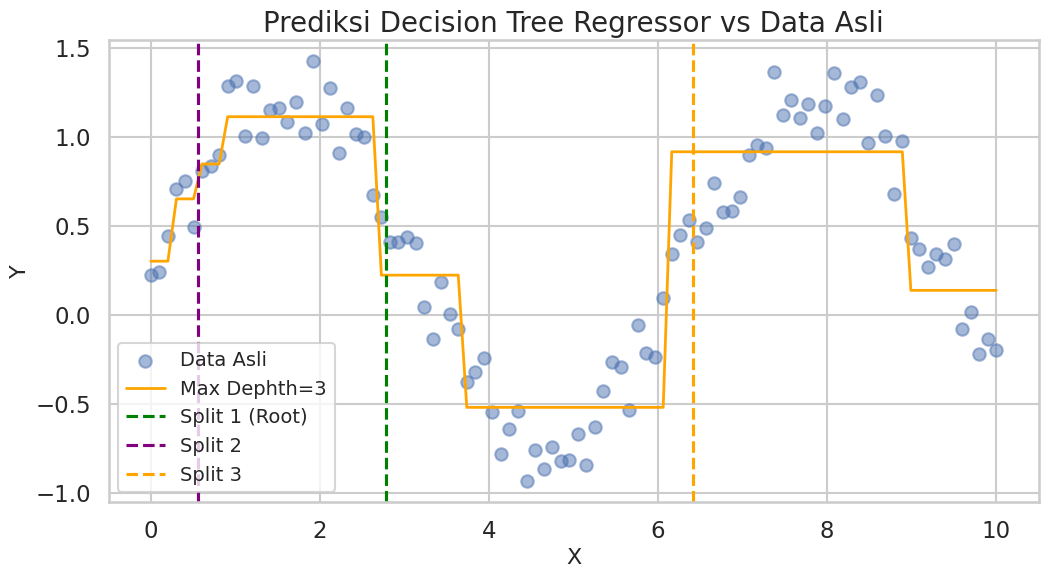

In [47]:
# buat prediksi
def plot_tree_reg(depth, color, label):
    # latih model
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg.fit(X, Y)
    Y_pred = tree_reg.predict(X)
    plt.plot(X, Y_pred, color=color, label=label, linewidth=2)

plt.figure(figsize=(12, 6))
plt.scatter(X, Y, label='Data Asli', alpha=0.5)
plot_tree_reg(3, 'orange', 'Max Dephth=3')

# Tambahkan garis vertikal untuk menunjukkan di mana pohon membuat "split"
plt.axvline(x=2.778, color='green', linestyle='--', label='Split 1 (Root)')
plt.axvline(x=0.556, color='purple', linestyle='--', label='Split 2')
plt.axvline(x=6.414, color='orange', linestyle='--', label='Split 3')

plt.title('Prediksi Decision Tree Regressor vs Data Asli', fontsize=20)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.legend(fontsize=14)
plt.show()

**Analisis:**

* **Garis Hijau (`X <= 2.778`):** Ini adalah pemecahan pertama dari *root node*. Semua data di sebelah kiri garis ini masuk ke satu cabang, dan semua yang di kanan masuk ke cabang lain.
* **Garis Ungu (`X <= 0.556`):** Ini adalah pemecahan kedua yang terjadi di cabang kiri.
* **Garis Oranye (`X <= 6.414`):** Ini adalah pemecahan kedua yang terjadi di cabang kanan.

Setiap "langkah" horizontal pada garis prediksi merah sesuai dengan satu **leaf node** di pohon kita. Nilai `y` dari langkah tersebut adalah `value` (rata-rata) dari *leaf node* tersebut.


### Kesimpulan

* `plot_tree` adalah alat yang sangat baik untuk "mengintip" ke dalam logika model Decision Tree Anda.
* Dengan memvisualisasikan pohon, kita dapat memahami dengan tepat **fitur apa** dan **nilai ambang batas apa** yang dianggap penting oleh model.
* Kemampuan interpretasi ini adalah salah satu keunggulan terbesar dari model berbasis pohon dibandingkan model "kotak hitam" (black box) yang lebih kompleks.

**Selanjutnya:**
Sekarang kita tahu cara kerja dan cara memvisualisasikan pohon, di subchapter berikutnya kita akan fokus pada implementasi praktisnya menggunakan Scikit-learn dalam alur kerja yang lebih lengkap.
